<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# <u><b>Capstone:</b></u> Recommending adjacent jobs to platfrom delivery riders using NLP and consine similarity

--- 
### Part 2: Clean adjacent job - F&B Grader job postings from jobsites
---

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from wordcloud import WordCloud
from matplotlib_venn import venn2

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity 

# user-defined functions
from eda_utils import show_missing, clean_string, get_top_post

In [2]:
# load scrapped job postings
posts=pd.read_csv('../Data/7515_FnBGrader.csv') 

In [3]:
posts

,job_exp_required,job_title,job_ssoc,job_description,job_salary
0,5,WINE ADVISOR,75159,1. DEVELOPMENT AND MANAGEMENT OF LE CLUB FICOF...,7500
1,5,CHIEF EXECUTIVE OFFICER,75159,"WE ARE LOOKING FOR A HANDS ON, DRIVEN, CHARISM...",12000
2,2,FOOD BEVERAGE TASTER AND GRADER,75159,JOB SCOPE LEAD THE TEAM AND ENSURE THE SERVICE...,3150
3,5,CEO CUM RESTAURANT MANAGER,75159,"SETTING AND DRIVING ORGANIZATIONAL VISION, OPE...",8750
4,1,RAFFLES HOTEL SINGAPORE ASSOCIATE SOMMELIER,75159,THE ASSOCIATE SOMMELIER IS RESPONSIBLE FOR DEL...,2750
5,1,ZK WINE SAKE SOMMELIER UP TO WINE NEWTON,75159,WINE / SAKE SOMMELIER LOCATION NEWTON WORKING ...,5000
6,1,ZK WINE SAKE SOMMELIER UP TO WINE NEWTON,75159,POSITION TITLE WINE / SAKE SOMMELIER LOCATION ...,5000
7,5,CHIEF EXECUTIVE OFFICER,75159,"WE ARE LOOKING FOR A HANDS ON, DRIVEN, CHARISM...",12000
8,2,FOOD BEVERAGE TASTER AND GRADER,75159,JOB SCOPE LEAD THE TEAM AND ENSURE THE SERVICE...,3150
9,5,CEO CUM RESTAURANT MANAGER,75159,"SETTING AND DRIVING ORGANIZATIONAL VISION, OPE...",8750


In [4]:
posts['job_salary'].quantile([0.25, 0.5, 0.75])

0.25    2600.0
0.50    3250.0
0.75    5500.0
Name: job_salary, dtype: float64

In [5]:
posts['job_exp_required'].quantile([0.25, 0.5, 0.75])

0.25    1.0
0.50    2.0
0.75    5.0
Name: job_exp_required, dtype: float64

In [6]:
posts=posts[['job_description']].copy(deep=True)
posts['job_description']=posts['job_description'].map(lambda x: x.lower().strip())

In [7]:
show_missing(posts)

,variable,dtype,count,nunique,missing,pc_missing
0,job_description,object,47,22,0,0.0


In [8]:
# Proprocess title_text
posts['job_desc_proc']=posts['job_description'].map(lambda x: clean_string(x, stem='spacy'))

# have explored using NLTK's stemming and lemmazitaion as well. spaCy's lemmazitation produces better results. 
# spaCy lemmatization is better than NLTK lemmatization as it takes into account part-of-speech tag by default
# lemmatization is better than stemming as context of text is important for this analysis.

In [9]:
posts

,job_description,job_desc_proc
0,1. development and management of le club ficof...,development management le club ficofi sea memb...
1,"we are looking for a hands on, driven, charism...",look hand drive charismatic visionary adaptabl...
2,job scope lead the team and ensure the service...,scope lead team ensure service standard uphold...
3,"setting and driving organizational vision, ope...",set drive organizational vision operational st...
4,the associate sommelier is responsible for del...,associate sommelier responsible deliver friend...
5,wine / sake sommelier location newton working ...,wine sake sommeli location newton working day ...
6,position title wine / sake sommelier location ...,position title wine sake sommeli location newt...
7,"we are looking for a hands on, driven, charism...",look hand drive charismatic visionary adaptabl...
8,job scope lead the team and ensure the service...,scope lead team ensure service standard uphold...
9,"setting and driving organizational vision, ope...",set drive organizational vision operational st...


<Figure size 640x480 with 0 Axes>

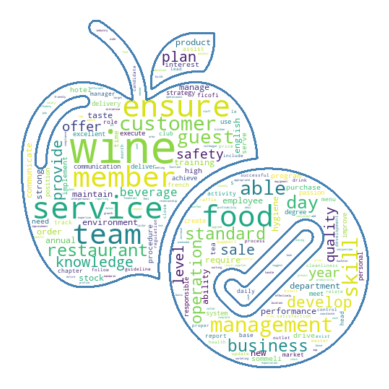

<Figure size 640x480 with 0 Axes>

In [10]:
# Read the whole text.
text = ' '.join(posts['job_desc_proc'])
# read the mask image
van_mask = np.array(Image.open('../Pictures/healthy-food.png'))

wc = WordCloud(background_color="white", max_words=200, mask=van_mask, collocations=False, contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(text)

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()

In [11]:
# CountVectorizer simply counts the number of times a word appears in a document (using a bag-of-words approach), 
# while TF-IDF Vectorizer takes into account not only how many times a word appears in a document 
# but also how important that word is to the whole corpus. TF-IDF Vectorizer is used below:

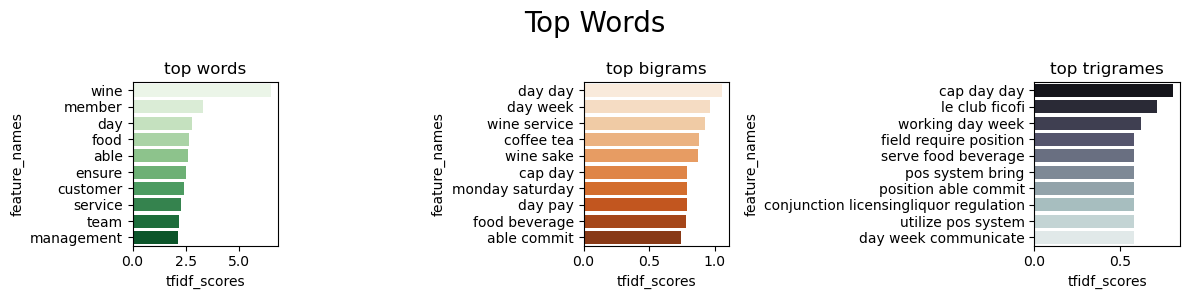

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))

g1=sns.barplot(data=get_top_post(posts['job_desc_proc'], ngram_range=(1,1), n=10),
               y='feature_names', x='tfidf_scores', ax = ax[0], palette='Greens')
g1.set_title(f'top words')

g2=sns.barplot(data=get_top_post(input=posts['job_desc_proc'], ngram_range=(2,2), n=10),
               y='feature_names', x='tfidf_scores', ax = ax[1], palette='Oranges')
g2.set_title(f'top bigrams')

g3=sns.barplot(data=get_top_post(input=posts['job_desc_proc'], ngram_range=(3,3), n=10),
               y='feature_names', x='tfidf_scores', ax = ax[2], palette='bone')
g3.set_title(f'top trigrames')

plt.suptitle('Top Words', fontsize=20)
plt.tight_layout()

In [13]:
posts.to_csv('../Data/7515_FnBGrader_cleaned.csv', index=False) 

In [14]:
posts=pd.read_csv('../Data/7515_FnBGrader_cleaned.csv') 
base_posts=pd.read_csv('../Data/8322_GoodsVehicleDriver_cleaned.csv') 

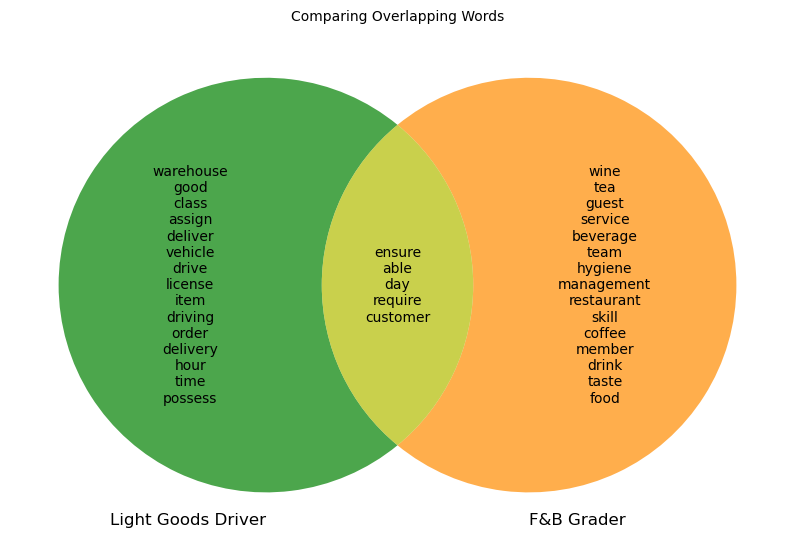

In [15]:
plt.figure(figsize=(10,10))
plt.title('Comparing Overlapping Words',fontsize=10)

set_a = set(get_top_post(input=base_posts['job_desc_proc'],ngram_range=(1,1),n=20)['feature_names'])
set_b = set(get_top_post(input=posts['job_desc_proc'],ngram_range=(1,1),n=20)['feature_names'])

venn = venn2([set_a,set_b],set_labels=['Light Goods Driver','F&B Grader'],set_colors=('green', 'darkorange'), alpha = 0.7)
venn.get_label_by_id('100').set_text('\n'.join(map(str,set_a-set_b)))
venn.get_label_by_id('110').set_text('\n'.join(map(str,set_a&set_b)))
venn.get_label_by_id('010').set_text('\n'.join(map(str,set_b-set_a)))

In [16]:
base_top_words_df=get_top_post(base_posts['job_desc_proc'], ngram_range=(1,1), n=1000)
base_top_text = ' '.join(base_top_words_df['feature_names'])

top_words_df=get_top_post(posts['job_desc_proc'], ngram_range=(1,1), n=1000)
top_text = ' '.join(top_words_df['feature_names'])

In [17]:
df=pd.DataFrame(data={'jobs': ['base_job','adjacent_job'], 'top_text' : [base_top_text,top_text]})
count = CountVectorizer()
count_matrix = count.fit_transform(df['top_text'])
cosine_sim = cosine_similarity(count_matrix)
print(cosine_sim)

[[1.    0.435]
 [0.435 1.   ]]
